## Homework 2 CME306
### Problem 4.5

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The discretization scheme for the finite difference method for the resolution of $-\Delta u=f$ on $\Omega=(0,1)^2$ with $u=0$ on $\partial \Omega$ and $f(x) = \sin(\pi x_1)\sin(\pi x_2)+\sin(\pi x_1)\sin(2\pi x_2)$ is described on the handwritten notes

In [5]:
f = lambda x: np.sin(np.pi * x[0]) * np.sin(np.pi * x[1]) + np.sin(np.pi * x[0]) * np.sin(2 * np.pi * x[1])

In [30]:
def solve(M):
    """
    Solves the two-point boundary value problem with the finite difference method and h = 1 / M
    Returns the approximate solution values on all the (M + 1) ^2 points of the discretization grid
    """
    
    h = 1 / M
    
    # Defining diagBloc of A
    diagBloc = 4 * np.eye(M - 1)
    for i in range(M - 2):
        diagBloc[i, i + 1], diagBloc[i + 1, i] = -1, -1
        
    # Defining A
    A = np.zeros(((M - 1) ** 2, (M - 1) ** 2))
    for i in range(M - 2):
        A[i * (M - 1): (i + 1) * (M - 1), (i + 1) * (M - 1): (i + 2) * (M - 1)] = -np.eye(M - 1)
        A[(i + 1) * (M - 1): (i + 2) * (M - 1), i * (M - 1): (i + 1) * (M - 1)] = -np.eye(M - 1)
    
    for i in range(M - 1):
        A[i * (M - 1): (i + 1) * (M - 1), i * (M - 1): (i + 1) * (M - 1)] = diagBloc.copy()
    
    # Defining b row wise
    b = h ** 2 * np.array([f((h * j1, h * j2)) for j2 in range(1, M) for j1 in range(1, M)])
    
    # Actually solving
    U = np.linalg.inv(A) @ b
    
    # Reshaping U: row-wise, the first row of the new U is the visually bottom row
    U = U.reshape((M - 1, M - 1))
    
    # Adding 0 to get a (M + 1) x (M + 1) matrix
    U = np.pad(U, [[1, 1], [1, 1]], mode='constant')
    
    return U

In [31]:
# Finite difference
U1 = solve(10)
U2 = solve(20)

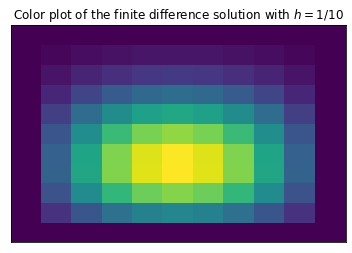

In [42]:
# Color plot for h = 1 / 10
plt.pcolormesh(U1)
plt.xticks([])
plt.yticks([])
plt.title(r'Color plot of the finite difference solution with $h=1/10$')
plt.show()

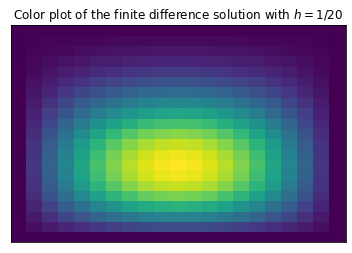

In [41]:
# Color plot for h = 1 / 20
plt.pcolormesh(U2)
plt.xticks([])
plt.yticks([])
plt.title(r'Color plot of the finite difference solution with $h=1/20$')
plt.show()

In [37]:
# Real solution
solution = lambda x: (2 * np.pi ** 2) ** (-1) * np.sin(np.pi * x[0]) * np.sin(np.pi * x[1]) + (5 * np.pi ** 2) ** (-1) * np.sin(np.pi * x[0]) * np.sin(2 * np.pi * x[1])

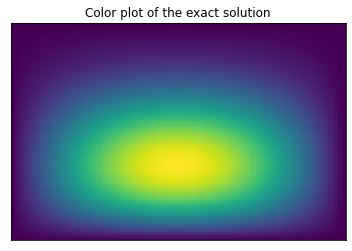

In [40]:
# Color plot of the exact solution
M = 100
h = 1 / M
exact_U = np.array([solution((h * j1, h * j2)) for j2 in range(M + 1) for j1 in range(M + 1)]).reshape((M + 1, M + 1))
plt.pcolormesh(exact_U)
plt.xticks([])
plt.yticks([])
plt.title('Color plot of the exact solution')
plt.show()

In [43]:
# Error at (0.5, 0.5) for h = 1 / 10 ie (5 / 10, 5 / 10)
abs(U1[5, 5] - solution((0.5, 0.5)))

0.00041873091515791383

In [44]:
# Error at (0.5, 0.5) for h = 1 / 20 ie (10 / 20, 10 / 20)
abs(U2[10, 10] - solution((0.5, 0.5)))

0.00010429530307747709